In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In /net/Jessica.Luo/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/Jessica.Luo/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/Jessica.Luo/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /net/Jessica.Luo/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/Jessica.Luo/miniconda3/lib/pytho

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'

case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'
#case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022_a','gfdl.ncrc4-intel19-prod'

In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
short_casename

'gzCOBALT-013022'

In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
#zoo_varlist = ['smz', 'mdz', 'lgz']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022


In [6]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

#pp_dates='1968-1972'
pp_dates='1988-2007'


files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-0

In [7]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [8]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [9]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

# Compute bulk diagnostics

In [10]:
intpp=(ds.pp * ds.depth_levels).sum(dim='z_l')
intpp=(intpp * grid.areacello).sum(dim=['yh', 'xh'])
intpp=intpp.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * carbon_molar_mass
print('net primary production: ' + str(np.format_float_scientific(intpp.values,2)) + ' g C / yr')

net primary production: 5.37e+16 g C / yr


In [11]:
concat_vars=['jprod_ndet_' + v + '_100' for v in ['nsmz','nmdz','nlgz','nsmt','nlgt','hp']]
concat_vars.extend(['jaggloss_nsmp_100','jaggloss_nlgp_100'])

totDetProd = xr.concat([ds[v] for v in concat_vars], dim='var').sum(dim='var')
totDetProd = (totDetProd * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
print('total detritus production in top 100m: ' + str(np.format_float_scientific(totDetProd.values,2)) + ' g C / yr')

total detritus production in top 100m: 8.88e+15 g C / yr


In [12]:
export100 = (ds.fndet_100 * grid.areacello).sum(dim=['yh', 'xh'])
export100 = export100.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
print('carbon export at 100 m: ' + str(np.format_float_scientific(export100.values,2)) + ' g C / yr')

carbon export at 100 m: 6.36e+15 g C / yr


In [13]:
totgraz=ds.graz * grid.areacello * ds.depth_levels
totgraz=totgraz.sum(dim=['yh','xh','z_l'])
totgraz=totgraz.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * carbon_molar_mass
print('total grazing: ' + str(np.format_float_scientific(totgraz.values,2)) + ' g C / yr')

total grazing: 3.88e+16 g C / yr


In [14]:
#totZingest = (ds.jingest_n_nsmz_100 + ds.jingest_n_nmdz_100 + ds.jingest_n_nlgz_100 + ds.jingest_n_nsmt_100 + ds.jingest_n_nlgt_100) 
concat_vars=['jingest_n_n' + v + '_100' for v in zoo_varlist]
totZingest = xr.concat([ds[v] for v in concat_vars], dim='var').sum(dim='var')

totZingest = (totZingest * grid.areacello).sum(dim=['yh','xh'])
totZingest = totZingest.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
print('total zooplankton ingestion (top 100 m): ' + str(np.format_float_scientific(totZingest.values,2)) + ' g C / yr')

total zooplankton ingestion (top 100 m): 5.11e+16 g C / yr


In [15]:
#hploss = (ds.jhploss_nmdz_100 + ds.jhploss_nlgz_100 + ds.jhploss_nsmt_100 + ds.jhploss_nlgt_100) 
concat_vars=['jhploss_n' + v + '_100' for v in zoo_varlist[1:]]
hploss = xr.concat([ds[v] for v in concat_vars], dim='var').sum(dim='var')
hploss = (hploss * grid.areacello).sum(dim=['yh','xh'])
hploss = hploss.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
print('total loss to HP (top 100 m): ' + str(np.format_float_scientific(hploss.values,2)) + ' g C / yr')

total loss to HP (top 100 m): 2.18e+15 g C / yr


In [16]:
#frac_smz_ingest = ds.jingest_n_nsmz_100 / (ds.jingest_n_nsmz_100 + ds.jingest_n_nmdz_100 + ds.jingest_n_nlgz_100 + ds.jingest_n_nsmt_100 + ds.jingest_n_nlgt_100) 
concat_vars=['jingest_n_n' + v + '_100' for v in zoo_varlist]
frac_smz_ingest = ds.jingest_n_nsmz_100 / (xr.concat([ds[v] for v in concat_vars], dim='var').sum(dim='var'))
frac_smz_ingest = frac_smz_ingest.mean()
print('fraction of small zooplankton ingestion: ' + str(np.round(frac_smz_ingest.values * 100)) + '%')

fraction of small zooplankton ingestion: 65.0%


In [17]:
phyc_zint = (ds.phyc.mean(dim='time') * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass #g C m-2
phyc_zint = phyc_zint.rename('phyc_zint')
val = (phyc_zint * grid.areacello).sum(dim=['yh', 'xh']).values
print('phytoplankton biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

phytoplankton biomass (depth integrated): 4.82e+14 g C


In [18]:
zooc_zint = (ds.zooc.mean(dim='time') * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass #g C m-2
val = (zooc_zint * grid.areacello).sum(dim=['yh','xh']).values
print('zooplankton biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

zooplankton biomass (depth integrated): 7.19e+14 g C


# Compute tunicate and mesozooplankton properties

In [19]:
tunmass_zint = (ds.ztunicate * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass # g C m-2
tunmass_zint = tunmass_zint.rename('tunmass_zint')

val = (tunmass_zint * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values
print('Total Tunicate Biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

Total Tunicate Biomass (depth integrated): 1.02e+14 g C


In [20]:
val1 =(ds.nsmt_100.mean(dim='time') * grid.areacello).sum(dim=['yh', 'xh']).values * cobalt_n_2_c * carbon_molar_mass
print('Small Tunicate total biomass (top 100m): ' + str(np.format_float_scientific(val1/1e15,2)) + ' Pg C')

val2 =(ds.nlgt_100.mean(dim='time') * grid.areacello).sum(dim=['yh', 'xh']).values * cobalt_n_2_c * carbon_molar_mass
print('Large Tunicate total biomass (top 100m): ' + str(np.format_float_scientific(val2/1e15,2)) + ' Pg C')

print('Total Tunicate biomass (top 100m): ' + str(np.format_float_scientific((val1+val2)/1e15,2)) + ' Pg C')

Small Tunicate total biomass (top 100m): 5.78e-03 Pg C
Large Tunicate total biomass (top 100m): 8.15e-02 Pg C
Total Tunicate biomass (top 100m): 8.73e-02 Pg C


In [21]:
mesomass_zint = (ds.zmeso * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass # g C m-2
mesomass_zint = mesomass_zint.rename('tunmass_zint')

val=(mesomass_zint * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values
print('Mesozooplankton biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

Mesozooplankton biomass (depth integrated): 3.56e+14 g C


In [22]:
val=((((ds.nlgz_100 + 0.5*ds.nmdz_100).mean(dim='time')*grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass).values
print('Med/large mesozooplankton biomass (to compare against COPEPOD) (top 100 m): ' + str(np.round(val/1e12,2)) + ' Tg C')

Med/large mesozooplankton biomass (to compare against COPEPOD) (top 100 m): 204.97 Tg C


In [23]:
tunprod100 = (ds.jprod_nsmt_100 + ds.jprod_nlgt_100) * seconds_per_day * cobalt_n_2_c # mol m-2 d-1
tunprod100 = tunprod100.rename('tunprod100')
#tunprod100.compute()

In [24]:
mzprod100 = (ds.jprod_nmdz_100 + ds.jprod_nlgz_100) * seconds_per_day * cobalt_n_2_c # mol m-2 d-1
mzprod100 = mzprod100.rename('mzprod100')

chl100 = (ds.chl * ds.depth_levels).isel(z_l=slice(None,10)).sum(dim='z_l') * 1e3 # g m-2
chl100 = chl100.rename('chl100')

In [25]:
val=(tunprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
print('Tunicate production, upper 100 m (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C y-1')

Tunicate production, upper 100 m (depth integrated): 4.9e+14 g C y-1


In [26]:
val=(mzprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
print('Mesozooplankton production, upper 100 m (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C y-1')

zratio=val/intpp.values
print('Z-ratio (mesozooplankton production/NPP), mean: ' + str(np.round(zratio, 3)))

Mesozooplankton production, upper 100 m (depth integrated): 3.89e+15 g C y-1
Z-ratio (mesozooplankton production/NPP), mean: 0.072


In [27]:
smtdetprod100 = (ds.jprod_ndet_nsmt_100.mean(dim='time') * grid.areacello).sum(dim=['xh','yh']) * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtdetprod100 = (ds.jprod_ndet_nlgt_100.mean(dim='time') * grid.areacello).sum(dim=['xh','yh']) * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

print('small tunicates detritus production: ' + str(np.round(smtdetprod100.values/1e15,2)) + ' Pg C y-1')
print('large tunicates detritus production: ' + str(np.round(lgtdetprod100.values/1e15,2)) + ' Pg C y-1')

small tunicates detritus production: 0.19 Pg C y-1
large tunicates detritus production: 0.79 Pg C y-1


Production / Biomass
--

In [28]:
#tunicate P/B
P=(tunprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nsmt_100 + ds.nlgt_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Tunicate P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Appendicularian P/B
P=(ds.jprod_nsmt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nsmt_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Small Tunicate P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Salps P/B
P=(ds.jprod_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nlgt_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Large Tunicate P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

Tunicate P/B: 5.61e+00 y-1
Small Tunicate P/B: 5.43e+00 y-1
Large Tunicate P/B: 5.62e+00 y-1


In [29]:
#mesozooplankton P/B
P=(mzprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nmdz_100 + ds.nlgz_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Mesozooplankton P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Medium Zooplankton P/B
P=(ds.jprod_nmdz_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=(ds.nmdz_100 * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Medium Zooplankton P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Large Zooplankton P/B
P=(ds.jprod_nlgz_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=(ds.nlgz_100 * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Large Zooplankton P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

Mesozooplankton P/B: 1.34e+01 y-1
Medium Zooplankton P/B: 1.81e+01 y-1
Large Zooplankton P/B: 6.63e+00 y-1


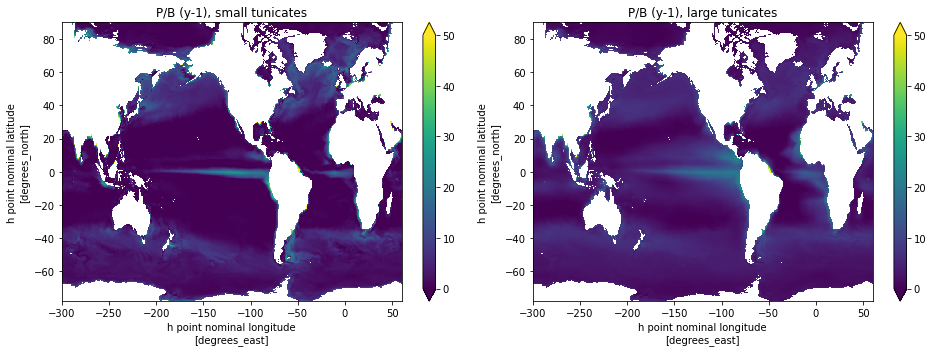

In [30]:
fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(ds.jprod_nsmt_100.mean(dim='time') * seconds_per_year / ds.nsmt_100.mean(dim='time')).plot(vmin=0,vmax=50,cmap='viridis')
plt.title('P/B (y-1), small tunicates')

fig.add_subplot(gs[0,1])
(ds.jprod_nlgt_100.mean(dim='time') * seconds_per_year / ds.nlgt_100.mean(dim='time')).plot(vmin=0,vmax=50,cmap='viridis')
plt.title('P/B (y-1), large tunicates')

plt.tight_layout()
#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_PBratios_Tunicates.png', bbox_inches='tight')

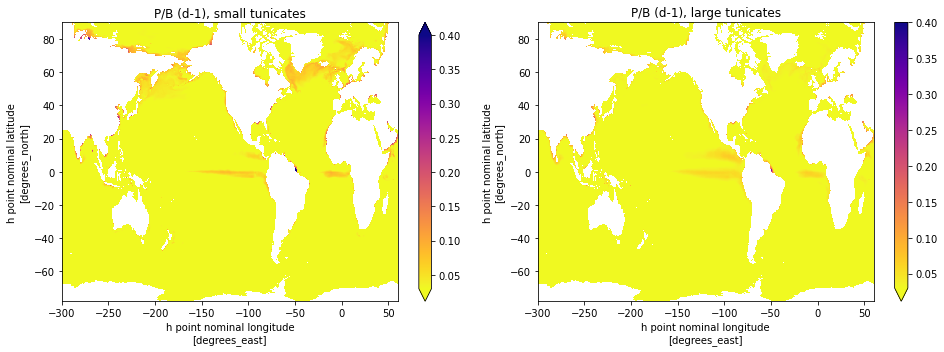

In [31]:
mo=6
fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(ds.jprod_nsmt_100.isel(time=mo) * seconds_per_day / ds.nsmt_100.isel(time=mo)).plot(vmin=0.03,vmax=.4,cmap='plasma_r')
plt.title('P/B (d-1), small tunicates')

fig.add_subplot(gs[0,1])
(ds.jprod_nlgt_100.isel(time=mo) * seconds_per_day / ds.nlgt_100.isel(time=mo)).plot(vmin=0.03,vmax=.4,cmap='plasma_r')
plt.title('P/B (d-1), large tunicates')

plt.tight_layout()
#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_PBratios_Tunicates.png', bbox_inches='tight')

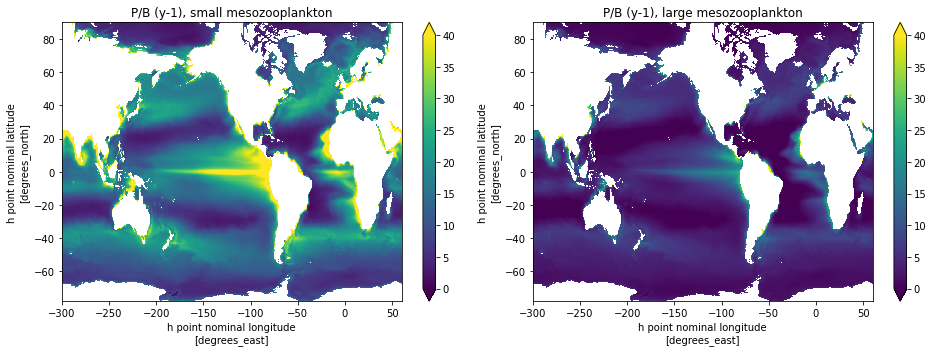

In [32]:
fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(ds.jprod_nmdz_100.mean(dim='time') * seconds_per_year / ds.nmdz_100.mean(dim='time')).plot(vmin=0,vmax=40,cmap='viridis')
plt.title('P/B (y-1), small mesozooplankton')

fig.add_subplot(gs[0,1])
(ds.jprod_nlgz_100.mean(dim='time') * seconds_per_year / ds.nlgz_100.mean(dim='time')).plot(vmin=0,vmax=40,cmap='viridis')
plt.title('P/B (y-1), large mesozooplankton')

plt.tight_layout()
#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_PBratios_Mesozooplankton.png', bbox_inches='tight')

## Fraction of mortality to consumption vs jelly-falls
#### Luo et al. 2020 model suggests jelly-falls should represent ~22% of production, and ~35% of total mortality. (therefore, predation would be 65% of total mortality)

In [33]:
tun_mort_pred_tot = ((ds.jzloss_nlgt_100 + ds.jhploss_nlgt_100) * cobalt_n_2_c * carbon_molar_mass * 
                     seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
tun_mort_pred_zoo = (ds.jzloss_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
tun_mort_pred_hp = (ds.jhploss_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
salpProd=(ds.jprod_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values

print('Salp prod to predators: ' + str(np.round(tun_mort_pred_tot/salpProd,3)) + ' y-1')
print('Salp mortality to predation: ' + str(np.format_float_scientific(tun_mort_pred_tot,2)) + ' y-1')
print('Salp mortality to zooplankton predation: ' + str(np.format_float_scientific(tun_mort_pred_zoo,2)) + ' y-1')
print('Salp mortality to HP predation: ' + str(np.format_float_scientific(tun_mort_pred_hp,2)) + ' y-1')


Salp prod to predators: 0.567 y-1
Salp mortality to predation: 2.60e+14 y-1
Salp mortality to zooplankton predation: 1.6e+14 y-1
Salp mortality to HP predation: 1.01e+14 y-1


In [34]:
if 'jaggloss_nlgt_100' in ds:
    tun_jellyfalls = (ds.jaggloss_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
    salpProd=(ds.jprod_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
    print('Salp mortality via jellyfalls: ' + str(np.format_float_scientific(tun_jellyfalls ,2)) + ' y-1')
    print('Fraction of total salp mortality to jellyfalls: ' + str(np.round(tun_jellyfalls/(tun_mort_pred_tot+tun_jellyfalls),2)) + ' y-1')
    print('Fraction of Salp production lost to jellyfalls: ' + str(np.round(tun_jellyfalls/salpProd,2)) + ' y-1')


Salp mortality via jellyfalls: 1.61e+14 y-1
Fraction of total salp mortality to jellyfalls: 0.38 y-1
Fraction of Salp production lost to jellyfalls: 0.35 y-1


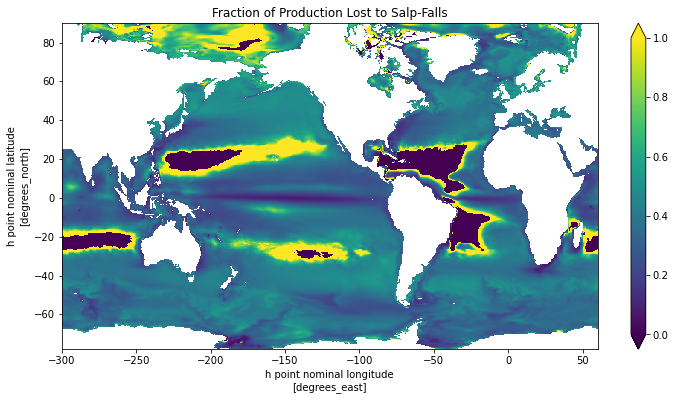

In [35]:
if 'jaggloss_nlgt_100' in ds:
    plt.figure(figsize=(12,6))
    (ds.jaggloss_nlgt_100.mean(dim='time') / ds.jprod_nlgt_100.mean(dim='time')).plot(vmin=0,vmax=1)
    plt.title('Fraction of Production Lost to Salp-Falls')
    #plt.savefig('plots/'+short_casename+'_'+pp_dates+'_FracProd_SalpFalls.png', bbox_inches='tight')

Gross Growth Efficiency
-------------

In [36]:
gge_smt = np.nansum(((ds.jprod_nsmt_100.mean(dim='time').where(ds.jprod_nsmt_100.mean(dim='time') > 0) / 
                 ds.jingest_n_nsmt_100.mean(dim='time').where(ds.jprod_nsmt_100.mean(dim='time') > 0)) * 
                grid.areacello.where(ds.jprod_nsmt_100.mean(dim='time') > 0)).values) / (grid.areacello.where(ds.jprod_nsmt_100.mean(dim='time') > 0).sum().values)
print('Small tunicates GGE (production/ingestion), mean: ' + str(np.round(gge_smt, 4)))

Small tunicates GGE (production/ingestion), mean: 0.0406


In [37]:
gge_lgt = np.nansum(((ds.jprod_nlgt_100.mean(dim='time').where(ds.jprod_nlgt_100.mean(dim='time') > 0) / 
                 ds.jingest_n_nlgt_100.mean(dim='time').where(ds.jprod_nlgt_100.mean(dim='time') > 0)) * 
                grid.areacello.where(ds.jprod_nlgt_100.mean(dim='time') > 0)).values) / (grid.areacello.where(ds.jprod_nlgt_100.mean(dim='time') > 0).sum().values)
print('Large tunicates GGE (production/ingestion), mean: ' + str(np.round(gge_lgt, 4)))

Large tunicates GGE (production/ingestion), mean: 0.1633


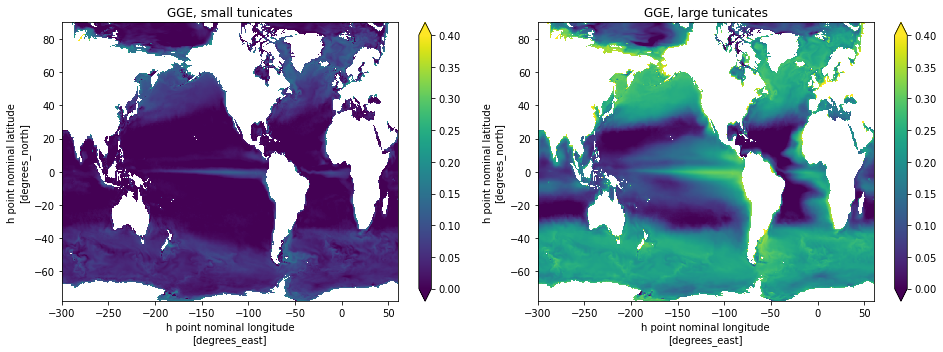

In [38]:
fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(ds.jprod_nsmt_100.mean(dim='time') / ds.jingest_n_nsmt_100.mean(dim='time')).plot(vmin=0,vmax=0.4, cmap='viridis')
plt.title('GGE, small tunicates')

fig.add_subplot(gs[0,1])
(ds.jprod_nlgt_100.mean(dim='time') / ds.jingest_n_nlgt_100.mean(dim='time')).plot(vmin=0,vmax=0.4, cmap='viridis')
plt.title('GGE, large tunicates')

plt.tight_layout()
#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_gge_tunicates.png', dpi=150, bbox_inches='tight')

In [39]:
gge_smz = np.nansum(((ds.jprod_nsmz_100.mean(dim='time').where(ds.jprod_nsmz_100.mean(dim='time') > 0) / 
                 ds.jingest_n_nsmz_100.mean(dim='time').where(ds.jprod_nsmz_100.mean(dim='time') > 0)) * 
                grid.areacello.where(ds.jprod_nsmz_100.mean(dim='time') > 0)).values) / (grid.areacello.where(ds.jprod_nsmz_100.mean(dim='time') > 0).sum().values)
print('Microzooplankton GGE (production/ingestion), mean: ' + str(np.round(gge_smz, 4)))    

Microzooplankton GGE (production/ingestion), mean: 0.2194


In [40]:
gge_mdz = np.nansum(((ds.jprod_nmdz_100.mean(dim='time').where(ds.jprod_nmdz_100.mean(dim='time') > 0) / 
                 ds.jingest_n_nmdz_100.mean(dim='time').where(ds.jprod_nmdz_100.mean(dim='time') > 0)) * 
                grid.areacello.where(ds.jprod_nmdz_100.mean(dim='time') > 0)).values) / (grid.areacello.where(ds.jprod_nmdz_100.mean(dim='time') > 0).sum().values)
print('Small mesozooplankton GGE (production/ingestion), mean: ' + str(np.round(gge_mdz, 4)))    

Small mesozooplankton GGE (production/ingestion), mean: 0.2327


In [41]:
gge_lgz = np.nansum(((ds.jprod_nlgz_100.mean(dim='time').where(ds.jprod_nlgz_100.mean(dim='time') > 0) / 
                 ds.jingest_n_nlgz_100.mean(dim='time').where(ds.jprod_nlgz_100.mean(dim='time') > 0)) * 
                grid.areacello.where(ds.jprod_nlgz_100.mean(dim='time') > 0)).values) / (grid.areacello.where(ds.jprod_nlgz_100.mean(dim='time') > 0).sum().values)
print('Large mesozooplankton GGE (production/ingestion), mean: ' + str(np.round(gge_lgz, 4)))    

Large mesozooplankton GGE (production/ingestion), mean: 0.2157


In [42]:
gge_bact = np.nansum(((ds.jprod_nbact_100.mean(dim='time').where(ds.jprod_nbact_100.mean(dim='time') > 0) / 
                 ds.juptake_ldon_nbact_100.mean(dim='time').where(ds.jprod_nbact_100.mean(dim='time') > 0)) * 
                grid.areacello.where(ds.jprod_nbact_100.mean(dim='time') > 0)).values) / (grid.areacello.where(ds.jprod_nbact_100.mean(dim='time') > 0).sum().values)
print('Bacteria GGE (production/ingestion), mean: ' + str(np.round(gge_bact, 4)))    

Bacteria GGE (production/ingestion), mean: 0.2718


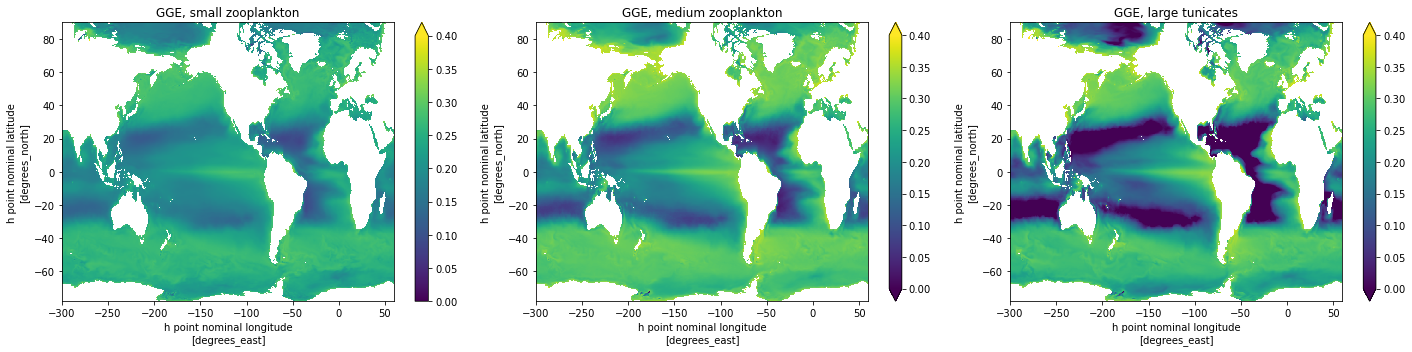

In [43]:
fig=plt.figure(figsize=(20,5))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
(ds.jprod_nsmz_100.mean(dim='time') / ds.jingest_n_nsmz_100.mean(dim='time')).plot(vmin=0,vmax=0.4, cmap='viridis')
plt.title('GGE, small zooplankton')

fig.add_subplot(gs[0,1])
(ds.jprod_nmdz_100.mean(dim='time') / ds.jingest_n_nmdz_100.mean(dim='time')).plot(vmin=0,vmax=0.4, cmap='viridis')
plt.title('GGE, medium zooplankton')

fig.add_subplot(gs[0,2])
(ds.jprod_nlgz_100.mean(dim='time') / ds.jingest_n_nlgz_100.mean(dim='time')).plot(vmin=0,vmax=0.4, cmap='viridis')
plt.title('GGE, large tunicates')

plt.tight_layout()
#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_gge_zooplankton.png', dpi=150, bbox_inches='tight')

In [44]:
from xhistogram.xarray import histogram

In [45]:
xbins=np.arange(-2,1,0.02)
ybins=np.arange(-4,2,0.05)

Text(0.5, 1.0, 'Large Zooplankton Biomass ~ Chlorophyll')

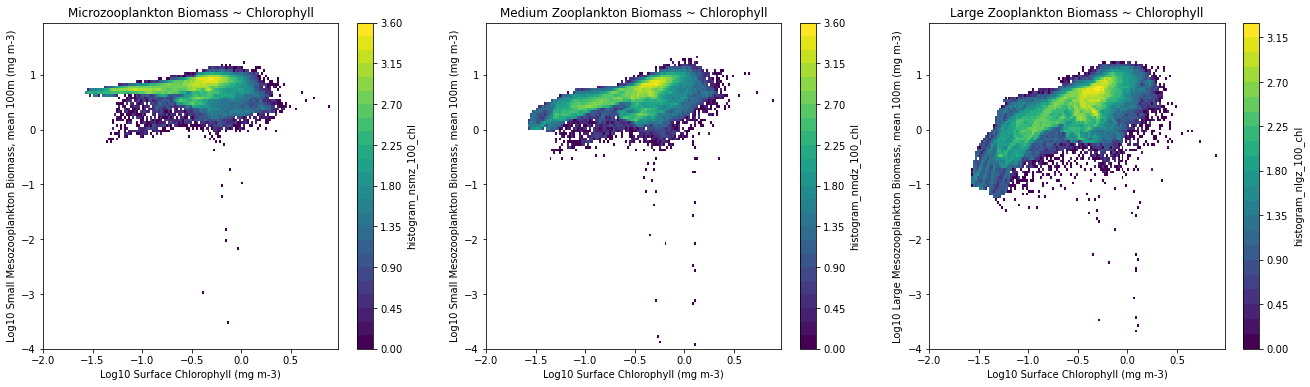

In [46]:
fig=plt.figure(figsize=(22.5,6))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
y=(ds.nsmz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Small Mesozooplankton Biomass, mean 100m (mg m-3)')
plt.title('Microzooplankton Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=(ds.nmdz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Small Mesozooplankton Biomass, mean 100m (mg m-3)')
plt.title('Medium Zooplankton Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,2])
y=(ds.nlgz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Large Mesozooplankton Biomass, mean 100m (mg m-3)')
plt.title('Large Zooplankton Biomass ~ Chlorophyll')

#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_xhistogram_panel_AllZ-Chl.png', bbox_inches='tight')

Text(0.5, 1.0, 'Large Tunicate Biomass ~ Chlorophyll')

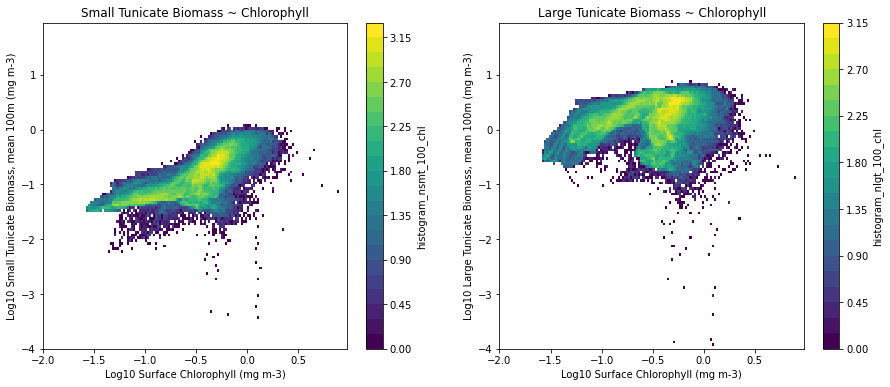

In [47]:
fig=plt.figure(figsize=(15,6))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
y=ds.nsmt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-3
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Small Tunicate Biomass, mean 100m (mg m-3)')
plt.title('Small Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=ds.nlgt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Large Tunicate Biomass, mean 100m (mg m-3)')
plt.title('Large Tunicate Biomass ~ Chlorophyll')

#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_xhistogram_panel_SmT+LgT-Chl.png', bbox_inches='tight')

In [48]:
def abline(slope, intercept, **kwargs):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

In [49]:
import pandas as pd
dt2=pd.read_csv('dt2cast_ZerosAsMinValue.csv')
dt2

,lon,lat,chl_gs_mean,Appendicularians,Thaliaceans,Copepods,Tunicates
0,-179.5,-59.5,0.390548,NaN,NaN,NaN,NaN
1,-179.5,-58.5,0.327493,NaN,NaN,NaN,NaN
2,-179.5,-57.5,0.284213,NaN,NaN,NaN,NaN
3,-179.5,-56.5,0.280899,NaN,NaN,NaN,NaN
4,-179.5,-55.5,0.263312,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
32780,179.5,58.5,1.285610,NaN,NaN,10.051831,NaN
32781,179.5,59.5,1.756678,NaN,NaN,5.944884,NaN
32782,179.5,60.5,1.761255,NaN,NaN,1.014612,NaN
32783,179.5,61.5,2.025337,NaN,NaN,3.915913,NaN


In [50]:
from scipy import stats
y=np.log10(dt2.Appendicularians)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
app_lm=stats.linregress(x[mask],y[mask])
print(app_lm)

y=np.log10(dt2.Thaliaceans)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
thal_lm=stats.linregress(x[mask],y[mask])
print(thal_lm)

y=np.log10(dt2.Copepods)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
cope_lm=stats.linregress(x[mask],y[mask])
print(cope_lm)

y=np.log10(dt2.Tunicates)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
tun_lm=stats.linregress(x[mask],y[mask])
print(tun_lm)

LinregressResult(slope=0.6266152195178636, intercept=-1.6974030918795975, rvalue=0.2275251570694458, pvalue=3.926243999688113e-43, stderr=0.044903204415309816, intercept_stderr=0.03473414656800233)
LinregressResult(slope=0.2163563551114854, intercept=-0.5858929175810268, rvalue=0.09236711982299184, pvalue=1.9822115388836256e-09, stderr=0.0359844885002872, intercept_stderr=0.027356390232681722)
LinregressResult(slope=0.5724557321918835, intercept=0.7227737636958664, rvalue=0.529537078908582, pvalue=0.0, stderr=0.009448498247281967, intercept_stderr=0.007055783640586123)
LinregressResult(slope=0.23480086380935075, intercept=-0.6467442815327124, rvalue=0.09902521955910874, pvalue=4.723001462614828e-12, stderr=0.033876488400441045, intercept_stderr=0.025169102310368573)


In [51]:
APP_CORR = 10 # REMSEN ET AL. 2004 (tables 4-5) suggest it should range from 5-15x for tunicates
ya=np.log10(dt2.Appendicularians * APP_CORR)
xa=np.log10(dt2.chl_gs_mean)
maska = np.isfinite(xa) & np.isfinite(ya)
app_lm_corr=stats.linregress(xa[maska],ya[maska])

THAL_CORR = 10 # REMSEN ET AL. 2004 (tables 4-5) suggest it should range from 5-15x for tunicates
yt=np.log10(dt2.Thaliaceans * THAL_CORR)
xt=np.log10(dt2.chl_gs_mean)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corr=stats.linregress(xt[maskt],yt[maskt])
thal_lm_corr

#LOWER BOUND
APP_CORR_LOW = 5
ya=np.log10(dt2.Appendicularians * APP_CORR_LOW)
mask = np.isfinite(xa) & np.isfinite(ya)
app_lm_corrlow=stats.linregress(xa[maska],ya[maska])
APP_CORR_HIGH = 15
ya=np.log10(dt2.Appendicularians * APP_CORR_HIGH)
mask = np.isfinite(xa) & np.isfinite(ya)
app_lm_corrhigh=stats.linregress(xa[maska],ya[maska])

THAL_CORR_LOW = 5
yt=np.log10(dt2.Thaliaceans * THAL_CORR_LOW)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corrlow=stats.linregress(xt[maskt],yt[maskt])
THAL_CORR_HIGH = 15
yt=np.log10(dt2.Thaliaceans * THAL_CORR_HIGH)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corrhigh=stats.linregress(xt[maskt],yt[maskt])

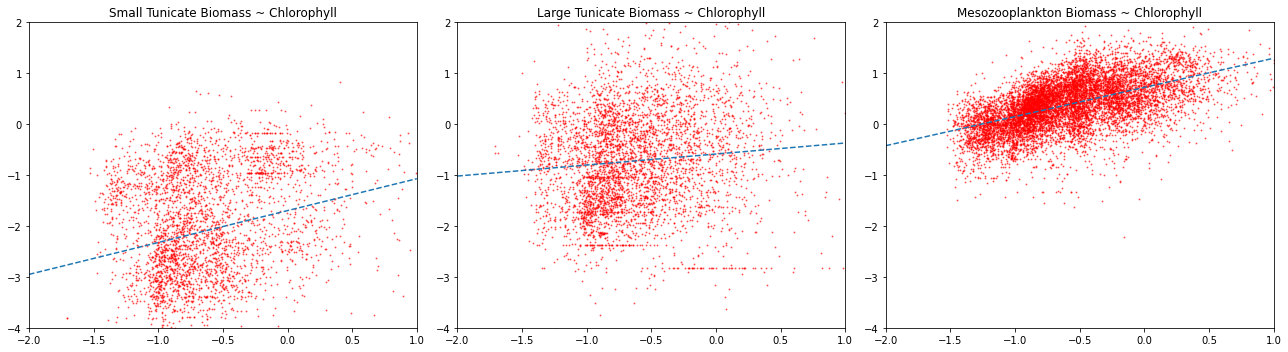

In [52]:
fig=plt.figure(figsize=(18,5))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='red')
plt.ylim(-4,2)
plt.xlim(-2,1)
abline(slope=app_lm.slope, intercept=app_lm.intercept)
plt.title('Small Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=dt2.Thaliaceans
x=dt2.chl_gs_mean
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='red')
plt.ylim(-4,2)
plt.xlim(-2,1)
abline(slope=thal_lm.slope, intercept=thal_lm.intercept)
plt.title('Large Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,2])
y=dt2.Copepods
x=dt2.chl_gs_mean
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='red')
plt.ylim(-4,2)
plt.xlim(-2,1)
abline(slope=cope_lm.slope, intercept=cope_lm.intercept)
plt.title('Mesozooplankton Biomass ~ Chlorophyll')


plt.tight_layout()
#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_mz_tun_cope_LOGbiomass-chl.png', dpi=150, bbox_inches='tight')

In [ ]:
fig=plt.figure(figsize=(18,5))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
y=ds.nsmt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-3
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.2,s=0.2, c='black')
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Small Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=ds.nlgt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.2,s=0.2, c='black')
yd=dt2.Thaliaceans
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Large Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,2])
y=(ds.nlgz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.2,s=0.2, c='black')
yd=dt2.Copepods
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Large Mesozooplankton Biomass ~ Chlorophyll')


plt.tight_layout()
#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_mz_tun_cope_LOGbiomass-chl.png', dpi=150, bbox_inches='tight')

## Regrid onto observational points

In [ ]:
var_keep = ['nsmt_100', 'nlgt_100', 'nmdz_100', 'nlgz_100', 'chl', 'xh', 'yh']
do = ds.drop([v for v in ds.variables if v not in var_keep])
do = do.where(do.z_l == 0, drop=True)
do = do.squeeze(drop=True)
do = do.rename({'xh': 'lon', 'yh': 'lat', 'chl':'surf_chl'})

In [ ]:
for var in ['surf_chl','nsmt_100','nlgt_100','nmdz_100','nlgz_100']:
    SH_subset = do[var].where(do.lat < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = do[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset
    
    # keep only growing season
    winter = full_field[[0,1,11],:,:]
    spring = full_field[[2,3,4],:,:]
    summer = full_field[[5,6,7],:,:]
    fall = full_field[[8,9,10],:,:]

    
    # southern hemisphere high latitudes
    winter[:,0:np.size(do.lat[do.lat < -60]),:] = np.nan
    #spring[:,0:np.size(do.lat[do.lat < -60]),:] = np.nan
    fall[:,0:np.size(do.lat[do.lat < -60]),:] = np.nan

    # southern hemisphere mid latitudes
    winter[:,np.size(do.lat[do.lat < -60]):np.size(do.lat[do.lat < -30]),:] = np.nan
    fall[:,np.size(do.lat[do.lat < -60]):np.size(do.lat[do.lat < -30]),:] = np.nan
    
    # northern hemisphere high latitudes
    winter[:,np.size(do.lat[do.lat < 60]):,:] = np.nan
    #spring[:,np.size(do.lat[do.lat < 60]):,:] = np.nan
    fall[:,np.size(do.lat[do.lat < 60]):,:] = np.nan

    # northern hemisphere mid latitudes
    winter[:,np.size(do.lat[do.lat < 30]):np.size(do.lat[do.lat < 60]),:] = np.nan
    fall[:,np.size(do.lat[do.lat < 30]):np.size(do.lat[do.lat < 60]),:] = np.nan    
    
    full_field[[0,1,11],:,:] = winter
    full_field[[2,3,4],:,:] = spring
    full_field[[5,6,7],:,:] = summer
    full_field[[8,9,10],:,:] = fall

    
    svar = var + '_gs'
    do[svar] = xr.DataArray(full_field, dims=do[var].dims, coords=do[var].coords)

do

In [ ]:
apps=dt2[['lon','lat','chl_gs_mean','Appendicularians']].dropna()
thals=dt2[['lon','lat','chl_gs_mean','Thaliaceans']].dropna()

In [ ]:
apps_locs=xr.Dataset()
apps_locs['lon']=xr.DataArray(data=apps.lon.values, dims=('location'))
apps_locs['lat']=xr.DataArray(data=apps.lat.values, dims=('location'))

thals_locs=xr.Dataset()
thals_locs['lon']=xr.DataArray(data=thals.lon.values, dims=('location'))
thals_locs['lat']=xr.DataArray(data=thals.lat.values, dims=('location'))

In [ ]:
import xesmf as xe

regridder_apps = xe.Regridder(do, apps_locs, 'bilinear', locstream_out=True, reuse_weights=True)
regridder_thals = xe.Regridder(do, thals_locs, 'bilinear', locstream_out=True, reuse_weights=True)

In [ ]:
ds_apps_rg = regridder_apps(do)
ds_thals_rg = regridder_thals(do)

In [ ]:
y=np.log10(ds_apps_rg.nsmt_100_gs.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100) # mg C m-3
x=np.log10(ds_apps_rg.surf_chl_gs.mean(dim='time') * 1e6) # mg m-3
mask = np.isfinite(x) & np.isfinite(y)
model_app_lm=stats.linregress(x[mask],y[mask])
print(model_app_lm)

y=np.log10(ds_thals_rg.nlgt_100_gs.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100) # mg C m-2
x=np.log10(ds_thals_rg.surf_chl_gs.mean(dim='time') * 1e6) # mg m-3
mask = np.isfinite(x) & np.isfinite(y)
model_thal_lm=stats.linregress(x[mask],y[mask])
print(model_thal_lm)

In [ ]:
# Crustacean Mesozooplankton

In [ ]:
copes=dt2[['lon','lat','chl_gs_mean','Copepods']].dropna()
cope_locs=xr.Dataset()
cope_locs['lon']=xr.DataArray(data=copes.lon.values, dims=('location'))
cope_locs['lat']=xr.DataArray(data=copes.lat.values, dims=('location'))

regridder_cope = xe.Regridder(do, cope_locs, 'bilinear', locstream_out=True, reuse_weights=True)
ds_cope_rg = regridder_cope(do)

In [ ]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Line2D([0], [0], marker='o', color='C0', markerfacecolor='C0', markersize=4, ls='None'),
                Line2D([0], [0], marker='o', color='k', markerfacecolor='k', markersize=4, ls='None'),
               (Patch(facecolor='#dddddd', edgecolor='grey'), Line2D([0], [0], color='#666666', lw=2, ls='--')),
                Line2D([0], [0], color='k', lw=2, ls='--')]
custom_lines2 = [Line2D([0], [0], marker='o', color='C0', markerfacecolor='C0', markersize=4, ls='None'),
                Line2D([0], [0], marker='o', color='k', markerfacecolor='k', markersize=4, ls='None'),
                Line2D([0], [0], color='#666666', lw=2, ls='--'),
                Line2D([0], [0], color='k', lw=2, ls='--')]
custom_labels=['Adj. Obs. Points','Model Points','Adj. Obs. Trend','Model Trend']

In [ ]:
labels=['a','b','c']
if '_b' in case:
    labels=['d','e','f']
if '_c' in case:
    labels=['g','h','i']
if '_d' in case:
    labels=['j','k','l']
if '_e' in case:
    labels=['m','n','o']
print(labels)

In [ ]:
fig=plt.figure(figsize=(15,5))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
plt.ylim(-3.5,3.5)
plt.xlim(-2,1)
y=ds_apps_rg.nsmt_100_gs.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-3
x=ds_apps_rg.surf_chl_gs.mean(dim='time') * 1e6 # mg m-3
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd*APP_CORR), alpha=0.5,s=1, c='#4573e6')
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
plt.fill_between(x_vals, app_lm_corrlow.intercept + app_lm_corrlow.slope * x_vals, 
                 app_lm_corrhigh.intercept + app_lm_corrhigh.slope * x_vals,
                 alpha=0.30, color='grey', interpolate=True)
abline(slope=app_lm_corr.slope, intercept=app_lm_corr.intercept, c='C1')
abline(slope=model_app_lm.slope, intercept=model_app_lm.intercept, c='black')
plt.gca().text(0.03, 0.97, labels[0], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

plt.legend(custom_lines, ['Adj. Obs. Points','Model Points',
                          'Adj. Obs. Trend (slope='+str(np.round(app_lm_corr.slope,2))+')',
                          'Model Trend (slope='+str(np.round(model_app_lm.slope,2))+')'])
plt.xlabel('Log$_{10}$ Surface Chlorophyll (mg m$^{-3}$)', fontsize=11.5)
plt.ylabel('Log$_{10}$ Small Tunicate Biomass (mg m$^{-3}$)', fontsize=11.5)


fig.add_subplot(gs[0,1])
plt.ylim(-3.5,3.5)
plt.xlim(-2,1)
y=ds_thals_rg.nlgt_100_gs.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds_thals_rg.surf_chl_gs.mean(dim='time') * 1e6 # mg m-3
yd=dt2.Thaliaceans
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd*THAL_CORR), alpha=0.5,s=1, c='#4573e6')
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
plt.fill_between(x_vals, thal_lm_corrlow.intercept + thal_lm_corrlow.slope * x_vals, 
                thal_lm_corrhigh.intercept + thal_lm_corrhigh.slope * x_vals,
                alpha=0.30, color='grey', interpolate=True)
abline(slope=thal_lm_corr.slope, intercept=thal_lm_corr.intercept,c='C1')
abline(slope=model_thal_lm.slope, intercept=model_thal_lm.intercept,c='black')
plt.gca().text(0.03, 0.97, labels[1], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

plt.legend(custom_lines, ['Adj. Obs. Points','Model Points',
                          'Adj. Obs. Trend (slope='+str(np.round(thal_lm_corr.slope,2))+')',
                          'Model Trend (slope='+str(np.round(model_thal_lm.slope,2))+')'])
plt.xlabel('Log$_{10}$ Surface Chlorophyll (mg m$^{-3}$)', fontsize=11.5)
plt.ylabel('Log$_{10}$ Large Tunicate Biomass (mg m$^{-3}$)', fontsize=11.5)

fig.add_subplot(gs[0,2])
plt.ylim(-3.5,3.5)
plt.xlim(-2,1)
yd=np.log10(dt2.Copepods)
xd=np.log10(dt2.chl_gs_mean)
maskd = np.isfinite(xd) & np.isfinite(yd)
obs_cope_lm=stats.linregress(xd[maskd],yd[maskd])
plt.scatter(x=xd,y=yd, alpha=0.5,s=1, c='#4573e6')

y=np.log10((ds_cope_rg.nlgz_100_gs + 0.5*ds_cope_rg.nmdz_100_gs).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100)
x=np.log10(ds_cope_rg.surf_chl_gs.mean(dim='time') * 1e6)
mask = np.isfinite(x) & np.isfinite(y)
model_cope_lm=stats.linregress(x[mask],y[mask])
plt.scatter(x=x,y=y, alpha=0.2,s=0.8, c='black')

abline(slope=obs_cope_lm.slope, intercept=obs_cope_lm.intercept, c='C1')
abline(slope=model_cope_lm.slope, intercept=model_cope_lm.intercept, c='black')
plt.gca().text(0.03, 0.97, labels[2], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')
plt.xlabel('Log$_{10}$ Surface Chlorophyll (mg m$^{-3}$)', fontsize=11.5)
plt.ylabel('Log$_{10}$ Crustacean Mesozoop. Biomass (mg m$^{-3}$)', fontsize=11.5)

plt.legend(custom_lines2, ['Obs. Points','Model Points',
                          'Obs. Trend (slope='+str(np.round(obs_cope_lm.slope,2))+')',
                          'Model Trend (slope='+str(np.round(model_cope_lm.slope,2))+')'])


plt.tight_layout()

